# Non Graded Challenge 12

Name : Kevin Giovanni Pradana

Batch : FTDS - 007

In [35]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
data.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,21759.0,3.912936e+02,2.074551e+03,0.000000,7.000000e+00,4.100000e+01,1.510000e+02,5.675700e+04
New Deaths,21759.0,1.322041e+01,7.648262e+01,0.000000,0.000000e+00,1.000000e+00,5.000000e+00,2.069000e+03
New Recovered,21759.0,3.773110e+02,1.999063e+03,0.000000,4.000000e+00,3.100000e+01,1.430000e+02,4.883200e+04
New Active Cases,21759.0,7.621674e-01,9.372135e+02,-25725.000000,-1.600000e+01,0.000000e+00,2.700000e+01,3.672600e+04
Total Cases,21759.0,8.525997e+04,3.685133e+05,1.000000,1.822500e+03,1.078000e+04,3.646450e+04,4.257243e+06
Total Deaths,21759.0,2.648289e+03,1.177601e+04,0.000000,5.000000e+01,2.830000e+02,1.050000e+03,1.438580e+05
Total Recovered,21759.0,7.671260e+04,3.403957e+05,0.000000,1.038500e+03,8.745000e+03,3.293250e+04,4.105680e+06
Total Active Cases,21759.0,5.899079e+03,2.751810e+04,-2306.000000,1.820000e+02,9.190000e+02,2.607500e+03,5.741350e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,21759.0,2.416026e+01,6.870827e+01,1.000000,7.000000e+00,1.100000e+01,1.800000e+01,4.160000e+02


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,0.0,21759.000000,...,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,20572.000000,19292.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,NaN,24.160256,...,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.395671,1.074145
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,NaN,68.708265,...,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,3.080207,1.578502
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.650000,0.660000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,0.990000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,NaN,18.000000,...,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.330000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


In [7]:
data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

# Data cleaning

In [8]:
data.isnull().sum().sort_values(ascending=False)

City or Regency                21759
Special Status                 18636
Growth Factor of New Deaths     2467
Growth Factor of New Cases      1187
Time Zone                        642
Island                           642
Province                         642
Total Rural Villages             642
Total Urban Villages             617
Total Cities                     614
Total Cases per Million            0
New Cases per Million              0
Latitude                           0
New Deaths per Million             0
Total Deaths per Million           0
Population Density                 0
Population                         0
Total Deaths per 100rb             0
Case Fatality Rate                 0
Case Recovered Rate                0
Area (km2)                         0
Longitude                          0
Date                               0
Total Districts                    0
Location ISO Code                  0
Continent                          0
Country                            0
L

In [15]:
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%


In [20]:
data.dropna(axis=1)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%


In [22]:
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
data.Location.value_counts()

DKI Jakarta                   642
Indonesia                     642
Riau                          641
Jawa Barat                    640
Banten                        637
Jawa Tengah                   635
Sulawesi Tenggara             633
Bali                          632
Kalimantan Timur              629
Daerah Istimewa Yogyakarta    627
Sumatera Utara                626
Jawa Timur                    625
Sulawesi Selatan              624
Jambi                         623
Kepulauan Riau                623
Papua                         621
Maluku                        620
Sumatera Selatan              620
Aceh                          617
Kalimantan Tengah             617
Lampung                       617
Sulawesi Tengah               617
Sulawesi Utara                617
Sumatera Barat                617
Papua Barat                   616
Maluku Utara                  616
Kalimantan Utara              614
Sulawesi Barat                614
Kalimantan Barat              614
Kalimantan Sel

In [27]:
#using two sample two tailed

daily_death_DKI = data[data['Location'] == 'DKI Jakarta'][['Date', 'Total Deaths']].groupby('Date').max()
daily_death_JB = data[data['Location'] == 'Jawa Barat'][['Date', 'Total Deaths']].groupby('Date').max()


In [30]:
print('Average death rate in DKI Jakarta a day : {}'.format(daily_death_DKI.mean()))
print('Average death rate in Jawa Barat a day : {}'.format(daily_death_JB.mean()))


Average death rate in DKI Jakarta a day : Total Deaths    5328.425234
dtype: float64
Average death rate in Jawa Barat a day : Total Deaths    4145.828125
dtype: float64


# Hypothesis Testing

using two sample from dki and jawa barat with two sample data

H0: μ_DKI_death = μ_JB_death

H1: μ_DKI_death != μ_JB_death

In [33]:
t_stat, p_val = stats.ttest_ind(daily_death_DKI, daily_death_JB)
print('P-value : ', p_val[0]) # showing p value
print('T-stat : ', t_stat[0])

P-value :  2.2424851492364933e-05
T-stat :  4.255028768028235


<Figure size 1440x360 with 0 Axes>

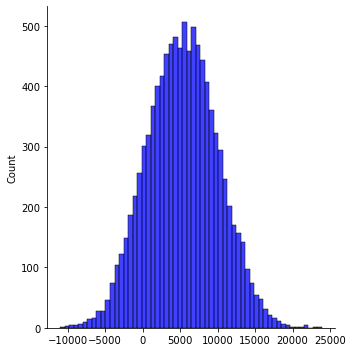

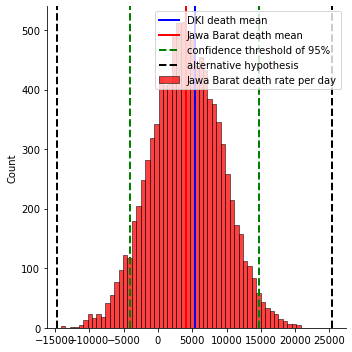

In [38]:
DKI_pop = np.random.normal(daily_death_DKI['Total Deaths'].mean(), daily_death_DKI['Total Deaths'].std(),10000)
JB_pop = np.random.normal(daily_death_JB['Total Deaths'].mean(), daily_death_JB['Total Deaths'].std(), 10000)

ci = stats.norm.interval(0.95, daily_death_DKI['Total Deaths'].mean(), daily_death_DKI['Total Deaths'].std())
plt.figure(figsize=(20,5))
sns.displot(DKI_pop, label='DKI death rate per day', color='blue')
sns.displot(JB_pop, label='Jawa Barat death rate per day', color='red')

plt.axvline(daily_death_DKI['Total Deaths'].mean(), color='blue', linewidth=2, label='DKI death mean')
plt.axvline(daily_death_JB['Total Deaths'].mean(), color='red', linewidth=2, label='Jawa Barat death mean')

plt.axvline(ci[1], color='green', linestyle='dashed',linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed',linewidth=2)

plt.axvline(DKI_pop.mean()+t_stat[0]*DKI_pop.std(), color='black', linestyle='dashed',linewidth=2, label='alternative hypothesis')
plt.axvline(DKI_pop.mean()-t_stat[0]*DKI_pop.std(), color='black', linestyle='dashed',linewidth=2)

plt.legend()
